<a href="https://colab.research.google.com/github/ptrim22/Trauma-Capstone/blob/main/Trauma_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib as plt
df=pd.read_csv(r'drive/MyDrive/Data Science Bootcamp/CogEmoPaper_FinalData.csv')

In [2]:
df

,ID,Age,Gender,FamilyStatus,Education,CFS_Total,TOT_TRAUMA,DTS_TOT,Total_FREE,Total_PACT,PCL_Total
0,3,27.0,0,1,15,58,4,39,14.0,10.250000,46.117647
1,4,38.0,1,2,16,58,2,40,20.5,10.250000,25.411765
2,6,29.0,1,1,16,51,4,33,14.0,8.330000,21.647059
3,7,24.0,1,1,16,58,1,0,14.5,8.330000,16.800000
4,8,25.0,1,1,17,58,1,56,13.5,6.000000,34.823529
...,...,...,...,...,...,...,...,...,...,...,...
104,156,25.0,0,1,14,56,5,30,15.0,9.750000,20.000000
105,157,23.0,1,2,14,37,2,76,18.0,6.000000,31.200000
106,160,21.0,1,1,12,62,2,61,16.5,10.000000,39.200000
107,161,29.0,0,1,16,61,1,11,14.0,8.833333,17.600000


In [3]:
df.describe()

,ID,Age,Gender,FamilyStatus,Education,CFS_Total,TOT_TRAUMA,DTS_TOT,Total_FREE,Total_PACT,PCL_Total
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,79.339450,25.225688,0.788991,1.302752,14.431193,56.293578,2.366972,40.889908,15.270642,9.158961,29.232596
std,45.915426,4.624420,0.409910,0.461571,2.157532,7.217908,1.613947,26.557882,2.839480,2.132077,11.339982
min,3.000000,19.000000,0.000000,1.000000,12.000000,37.000000,1.000000,0.000000,7.000000,2.666700,16.000000
25%,40.000000,22.000000,1.000000,1.000000,13.000000,52.000000,1.000000,20.000000,13.500000,7.830000,19.764706
50%,77.000000,24.000000,1.000000,1.000000,13.000000,57.000000,2.000000,39.000000,15.500000,9.160000,27.294118
75%,115.000000,27.000000,1.000000,2.000000,16.000000,61.000000,3.000000,57.000000,17.000000,10.500000,34.823529
max,163.000000,39.000000,1.000000,2.000000,20.000000,72.000000,7.000000,120.000000,24.000000,14.000000,68.705882


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e417a4f50>,
      dtype=object)

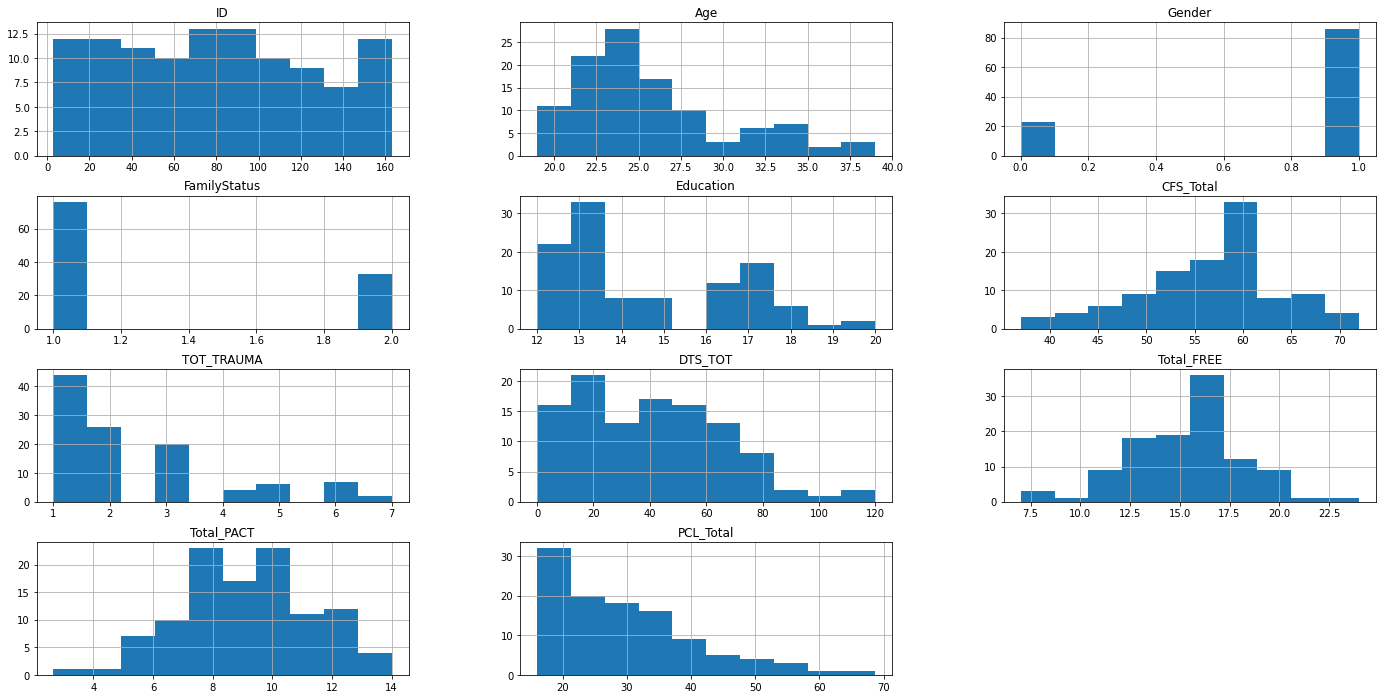

In [26]:
df.hist(figsize=(24,12))

In [34]:
df.isnull()


,ID,Age,Gender,FamilyStatus,Education,CFS_Total,TOT_TRAUMA,DTS_TOT,Total_FREE,Total_PACT,PCL_Total
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
104,False,False,False,False,False,False,False,False,False,False,False
105,False,False,False,False,False,False,False,False,False,False,False
106,False,False,False,False,False,False,False,False,False,False,False
107,False,False,False,False,False,False,False,False,False,False,False


In [37]:
df.isnull().sum()

ID              0
Age             0
Gender          0
FamilyStatus    0
Education       0
CFS_Total       0
TOT_TRAUMA      0
DTS_TOT         0
Total_FREE      0
Total_PACT      0
PCL_Total       0
dtype: int64